# **TIPO DE PERSONALIDADES MBTI**

---


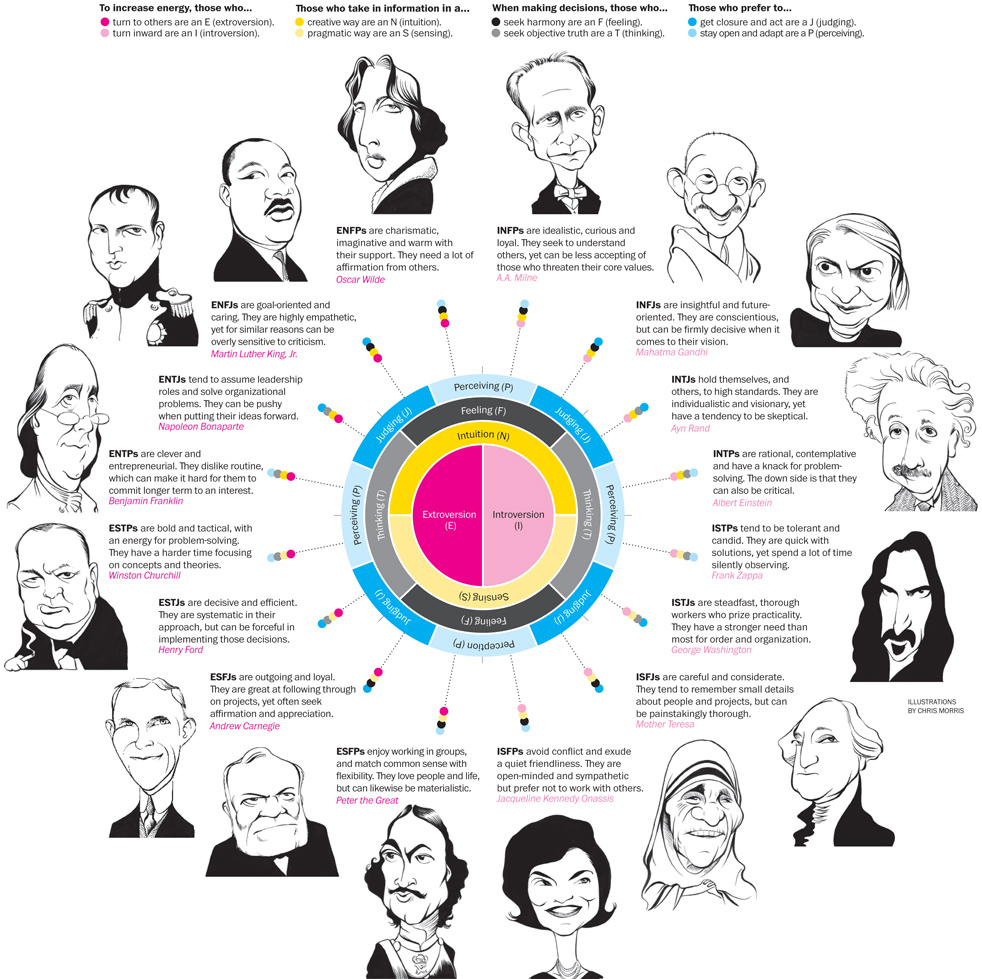

# Relación de las 16 personalidades MBTI entre las palabras, del dataset, usadas en el cuestionario
> Con este análisis, buscamos investigar si hay alguna relación entre las distintas personalidades y las palabras de las respuestas del cuestionario de personalidad.
> ¿Qué es lo que haremos? Realizaremos:

1. Preprocesamiento del dataset para seleccionar las palabras más importantes por cada tipo de personalidad.
2. Normalización de las frecuencias de las palabras según la cantidad de registros por cada tipo de personalidad para tener una frecuencia que no esté influida por la cantidad de registros.
3. Visualización de las frecuencias de las palabras por cada tipo de personalidad en una nube de palabras para tener una idea general de las palabras más importantes.
4. Agrupamiento por el algoritmo de KMeans, que realiza un agrupamiento por cercanía en el espacio de las frecuencias de las palabras, y realizamos una reducción de las variables en dos componentes principales para graficar los grupos obtenidos que nos permitirán ver la cercanía entre los distintos grupos de tipos de personalidad.


In [ ]:
# importaciones
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! git clone https://github.com/Carolina-Bolatti/Pro.Fin.-Proces.Datos.git


! cp '/content/drive/MyDrive/Colab Notebooks/ProcesamientoDeDatos/MBTI500.csv' 'Pro.Fin.-Proces.Datos/data/'
%cd 'Pro.Fin.-Proces.Datos'
!git pull
! ls
! chmod 777 src/preprocesamiento.sh
! src/preprocesamiento.sh
#! ls -lrt data
! head data/MBTI500.data.enriched.txt

Mounted at /content/drive
Cloning into 'Pro.Fin.-Proces.Datos'...
remote: Enumerating objects: 326, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 326 (delta 53), reused 38 (delta 15), pack-reused 217
Receiving objects: 100% (326/326), 7.23 MiB | 28.14 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/Pro.Fin.-Proces.Datos
Already up to date.
data  README.md  requirements.txt  src
type	count	actually	also	always	come	could	de	det	en	enfj	enfp	entj	entp	er	esfj	esfp	estj	estp	even	fe	feel	fi	find	friend	function	german	germany	get	give	go	good	help	ikke	infj	infp	interest	intj	intp	isfj	isfp	istj	istp	jeg	know	life	like	lol	look	lot	love	make	mean	much	need	og	one	people	person	pretty	really	right	say	se	see	seem	si	someone	something	still	take	talk	thank	thing	think	though	til	time	try	type	u	use	want	way	well	work	would	yeah	year	
ENFJ	1534	0	3437	0	2409	0	0	0	3817	3817	0	0	0	0	0	0	0	0	2714	2705	7462	310

### Comentarios: 1. Preprocesamiento
Como el archivo MBTI500.csv es muy grande, no pudimos insertarlo en el GitHub, por lo tanto habría que copiarlo manualmente subiéndolo al drive y copiándolo a la carpeta data.
Usamos comandos de linux y código Python para llevarlo a cabo:
```
cat -> imprime el archivo
| (pipe) -> concatena operaciones
> (mayor) -> redirecciona la salida a un archivo pisándolo
>> (mayor mayor) -> redirecciona la salida a un archivo agregando más líneas
grep -> filtra las líneas que contienen un texto
tail -> podemos seleccionar las últimas líneas de un archivo o eliminar la primer línea
awk -> permite seleccionar columnas de un archivo csv
sed -> reemplaza un texto por otro
sort -> ordena las líneas
uniq -> agrupa las líneas repetidas (el archivo tiene que estar ordenado inicialmente)
head -> selecciona las n primeras líneas de un archivo
enrich.py -> programa python que permite enriquecer un archivos usando un diccionario, agregando una columna con los valores del diccionario
```
*   Generamos un archivo por cada tipo de personalidad
*   Contamos los registros por cada tipo (count)
*   Contamos las palabras en cada tipo
*   Selecciomos las 40 palabras que más se repiten en cada tipo y agregamos una columna con la frecuencia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!pwd
#!ls
# leyendo el dataset
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')

print()
print("Dataset MBTI preprocesado de tipo de presonalidades")
print()
mbti


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset MBTI preprocesado de tipo de presonalidades



,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,4462,2421,2421,4354,3903,2921,2824,5231,0,0
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,12209,0,0,19387,15935,11149,13580,16753,0,0
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,7091,4990,4990,8172,6828,5514,6942,9739,0,0
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,25091,21804,21804,30172,29124,22458,25334,37707,0,0
4,ESFJ,181,0,450,332,314,0,0,0,0,...,891,335,335,507,488,381,0,626,0,0
5,ESFP,360,0,774,0,585,0,0,0,0,...,1458,648,648,810,857,692,552,1277,622,0
6,ESTJ,482,0,926,0,0,0,780,1753,810,...,1862,807,807,1047,979,710,828,1529,0,0
7,ESTP,1986,2550,4787,0,0,2764,0,0,0,...,3167,2705,3778,4199,3626,3759,3014,7024,0,2585
8,INFJ,14963,0,33727,0,24270,0,0,0,0,...,29741,23748,23748,44660,40800,27674,32591,44185,0,0
9,INFP,12134,0,26719,20017,18875,0,0,0,0,...,24522,18247,18247,34838,30809,22687,23215,35937,0,0


In [ ]:
# normalizacion
palabras = ['actually','also','always','come','could','de','det','en','enfj','enfp','entj','entp','er','esfj','esfp','estj','estp','even','fe','feel','fi','find','friend','function','german','germany','get','give','go','good','help','ikke','infj','infp','interest','intj','intp','isfj','isfp','istj','istp','jeg','know','life','like','lol','look','lot','love','make','mean','much','need','og','one','people','person','pretty','really','right','say','se','see','seem','si','someone','something','still','take','talk','thank','thing','think','though','til','time','try','type','u','use','want','way','well','work','would','yeah','year']
print(len(palabras))
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
for palabra in palabras:
  mbti[palabra] = mbti[palabra] / mbti['count']

print("Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad SIN NORMALIZAR")
print()
mbti



87
Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad SIN NORMALIZAR



,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,0.000000,2.488266,...,2.908735,1.578227,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,0.000000,3.041349,...,1.979731,0.000000,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,0.000000,2.825381,...,2.399662,1.688663,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,0.000000,2.363497,...,2.139957,1.859616,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,0.000000,0.000000,...,4.922652,1.850829,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,0.000000,...,4.050000,1.800000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,1.618257,3.636929,1.680498,...,3.863071,1.674274,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,0.000000,0.000000,...,1.594663,1.362034,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,0.000000,0.000000,...,1.987636,1.587115,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,0.000000,0.000000,...,2.020933,1.503791,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000


### Comentarios: 2. Normalización
Se dividen las frecuencias de cada una de las palabras por cantidad de registos de cada personalidad. De ese modo normalizamos para que no influya la cantidad de registros en la frecuencia.

Nube de palabras según la personalidad




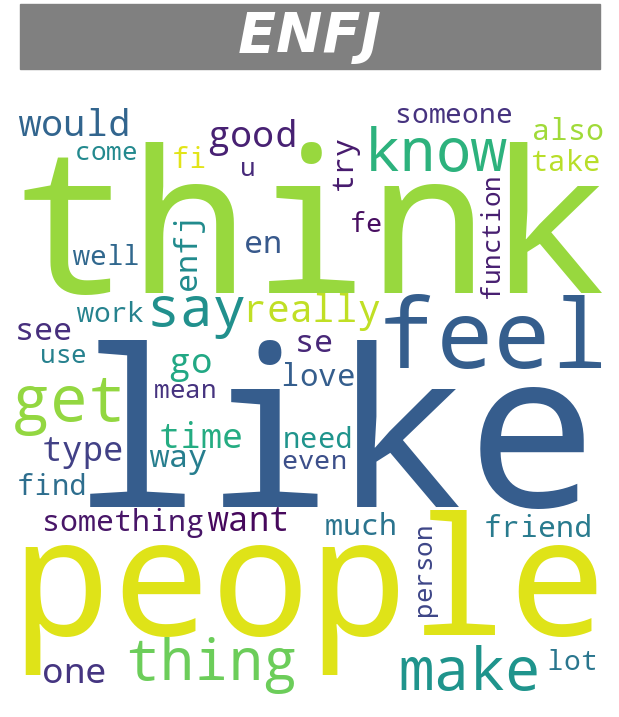

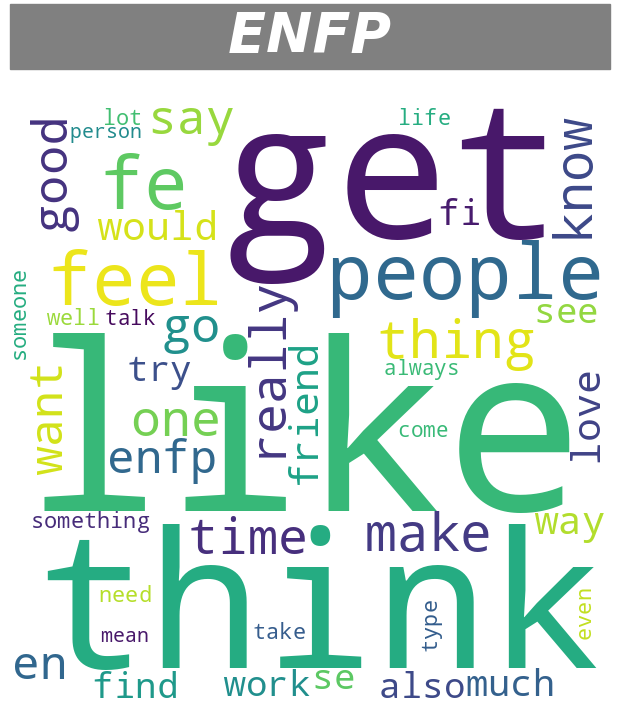

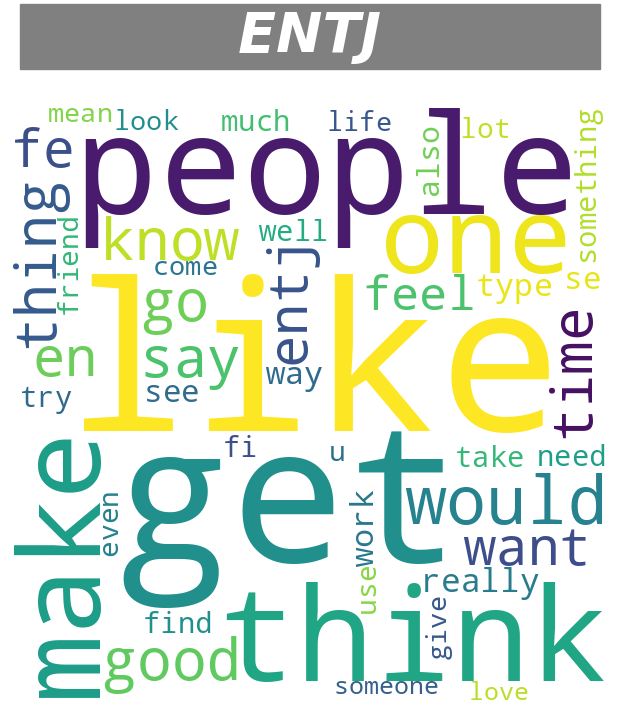

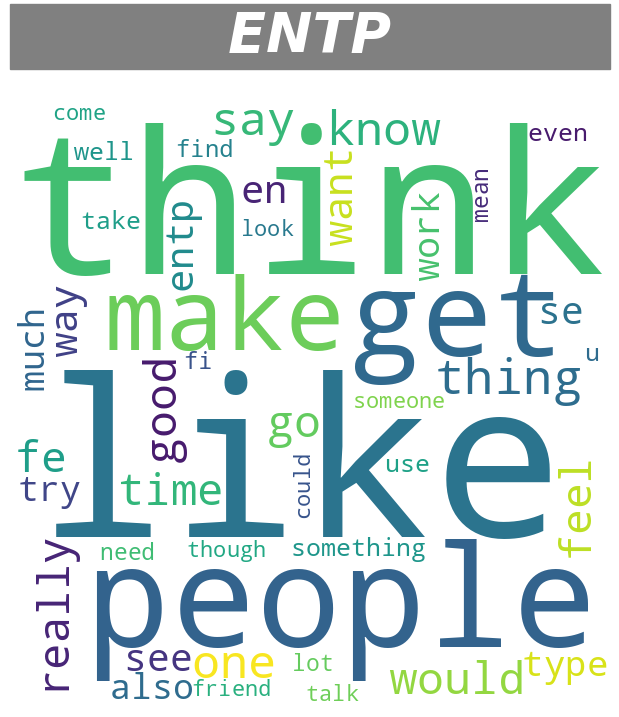

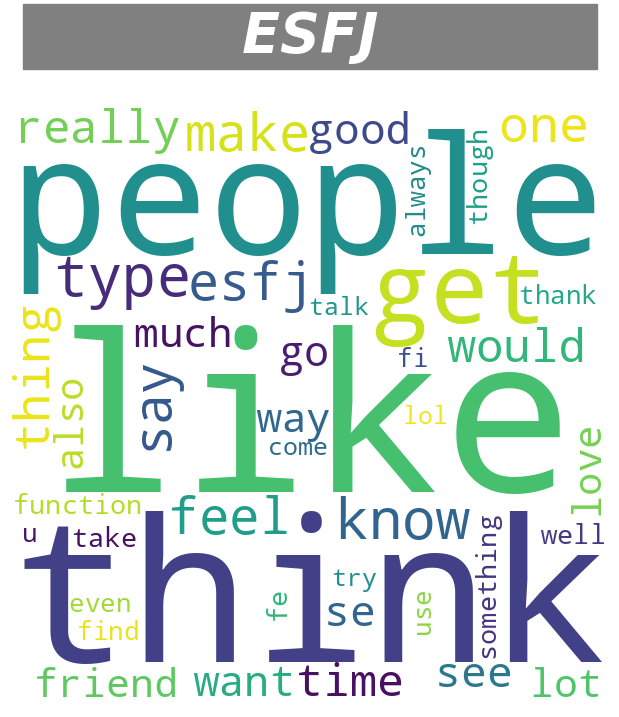

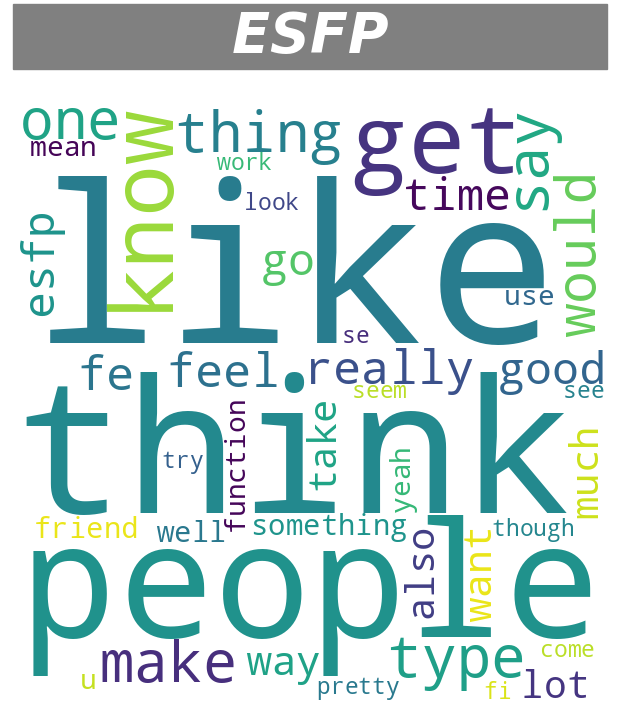

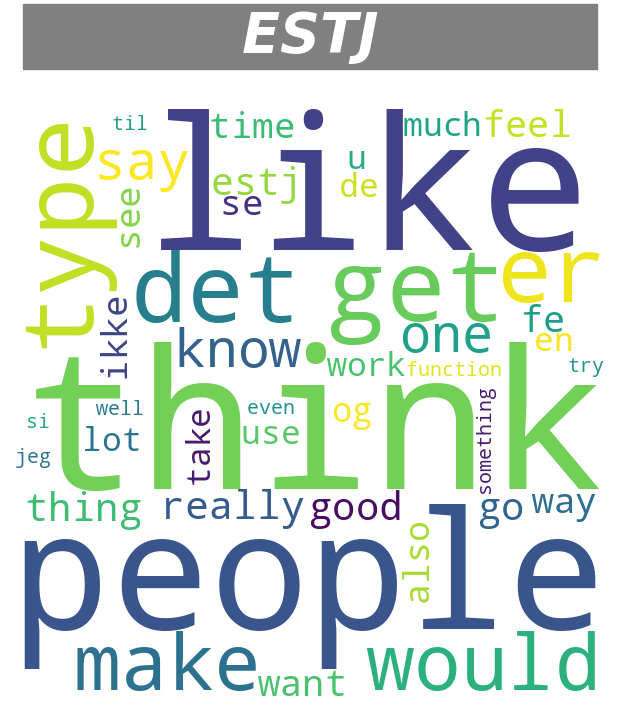

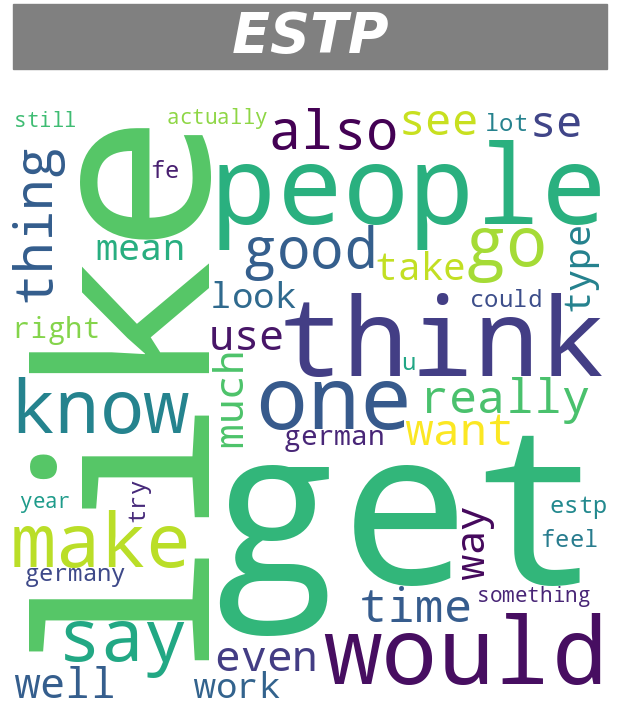

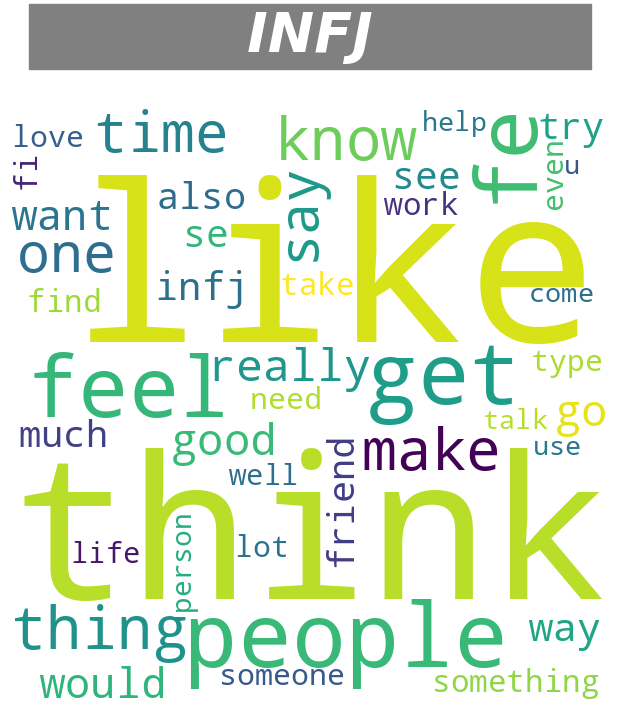

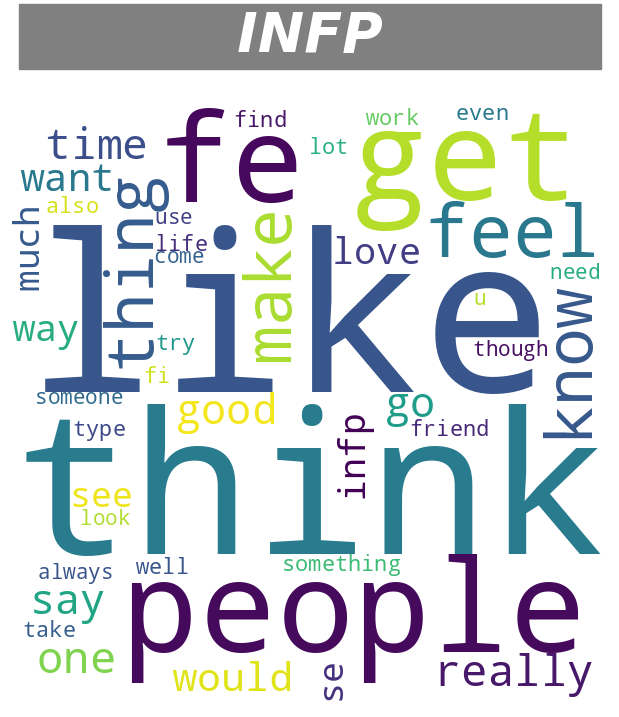

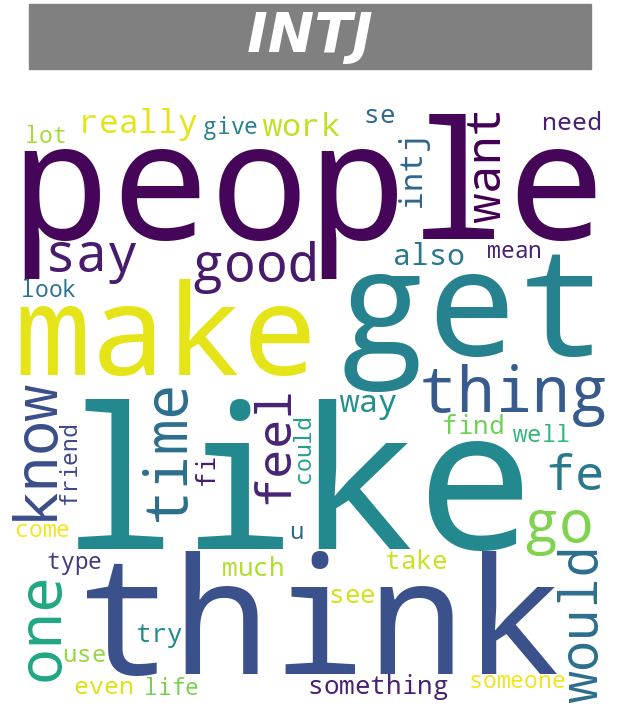

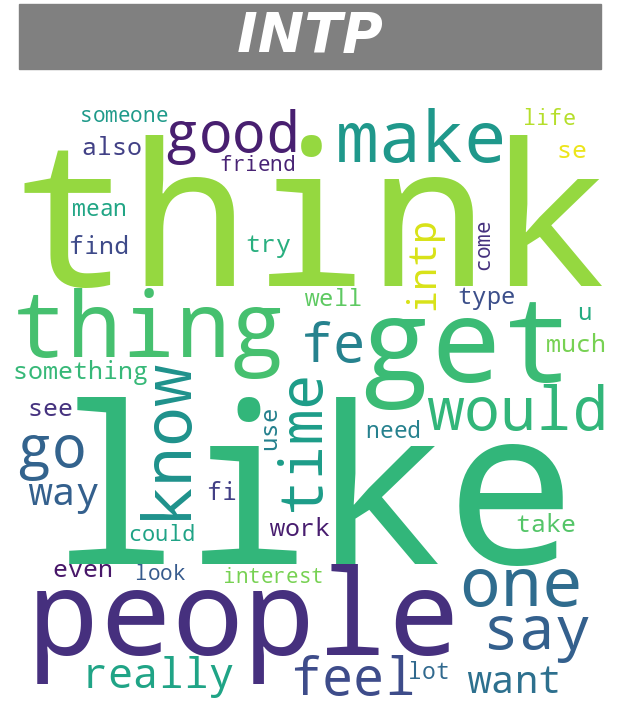

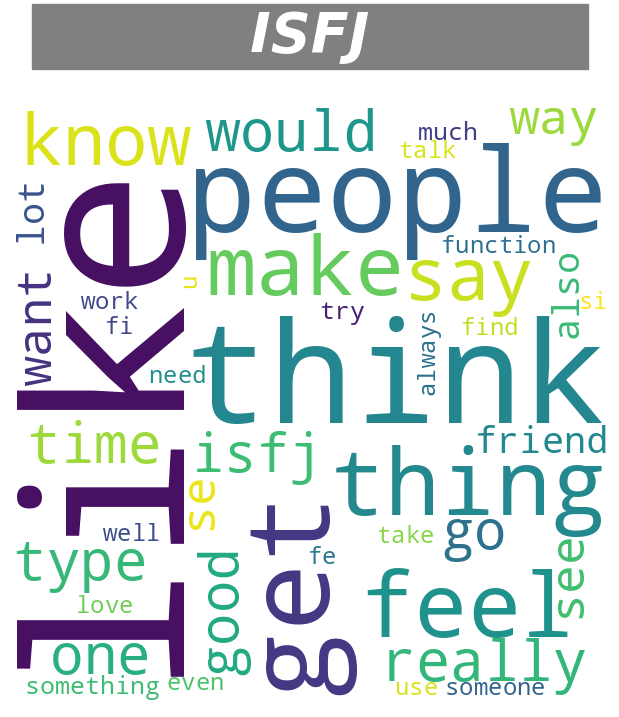

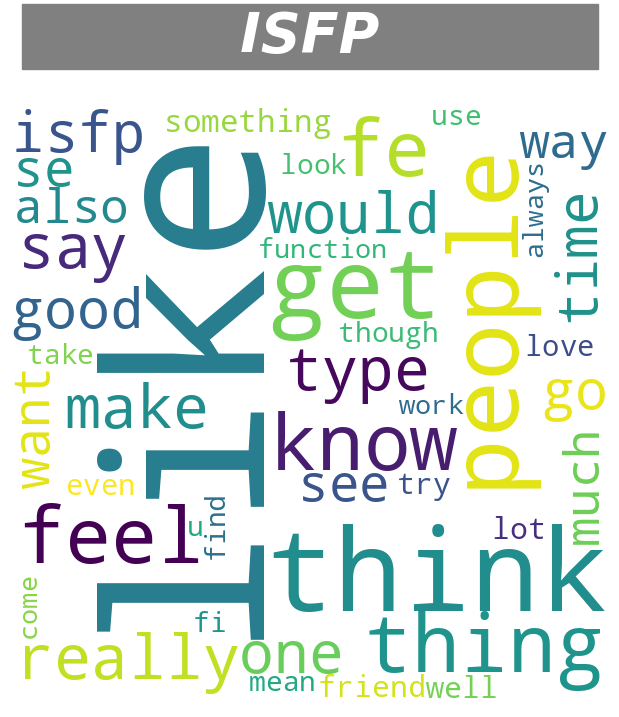

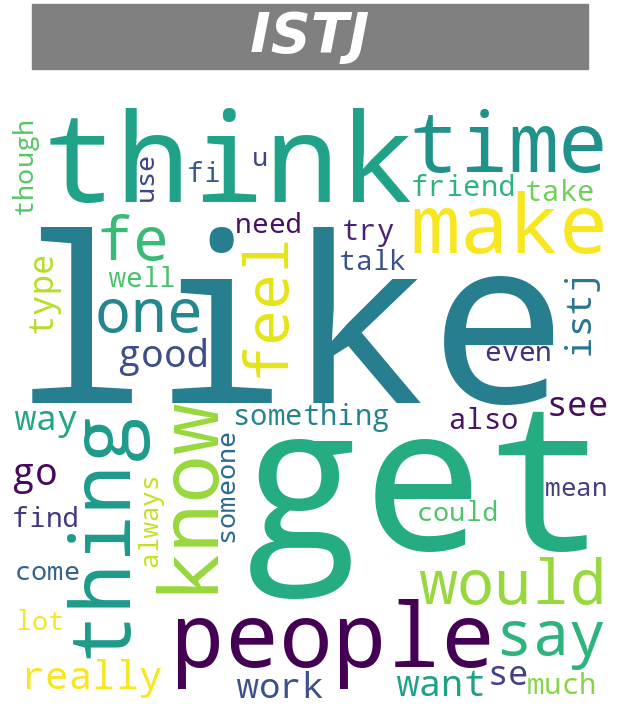

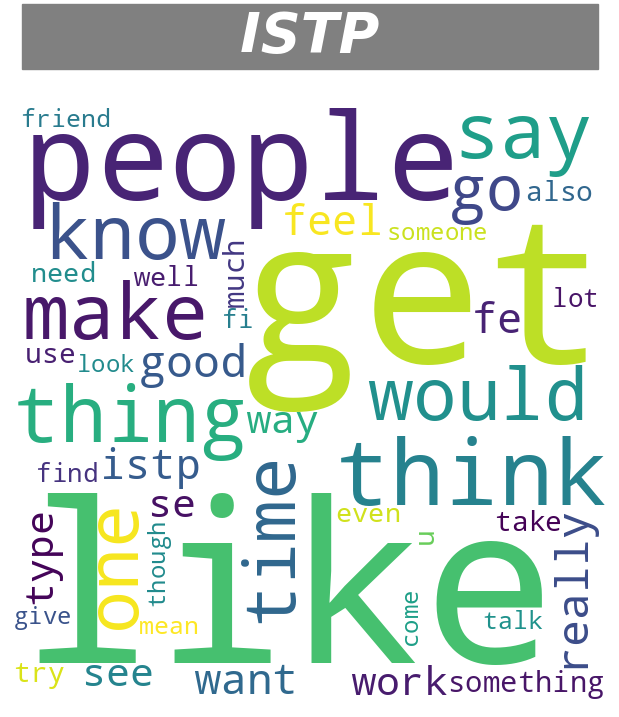

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Nube de palabras según la personalidad")
print()
print()

for index, row in mbti.iterrows():
  words = {}
  for palabra in palabras:
    words[palabra] = row[palabra]
  wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(words)
  plt.figure(figsize = (6, 6), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(label='           ' + row['personality'] + '           ',
          fontsize=40,
          backgroundcolor='gray',
          color="white",
          fontstyle="italic",
          pad="40.0",
          weight='bold')
  plt.show()
  print()
  print()




### Comentarios: 3. Visualización por Nube de Palabras
Usando las frecuencias de las palabras en cada tipo de personalidad realizamos una nube de palabras usando la biblioteca wordcloud de python. Cuanta más frecuencia, más grande es la palabra. Usamos el método de la biblioteca que toma un diccionario de frecuencias por palabra.

Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):
['actually' 'also' 'always' 'come' 'could' 'de' 'det' 'en' 'enfj' 'enfp'
 'entj' 'entp' 'er' 'esfj' 'esfp' 'estj' 'estp' 'even' 'fe' 'feel' 'fi'
 'find' 'friend' 'function' 'german' 'germany' 'get' 'give' 'go' 'good'
 'help' 'ikke' 'infj' 'infp' 'interest' 'intj' 'intp' 'isfj' 'isfp' 'istj'
 'istp' 'jeg' 'know' 'life' 'like' 'lol' 'look' 'lot' 'love' 'make' 'mean'
 'much' 'need' 'og' 'one' 'people' 'person' 'pretty' 'really' 'right'
 'say' 'se' 'see' 'seem' 'si' 'someone' 'something' 'still' 'take' 'talk'
 'thank' 'thing' 'think' 'though' 'til' 'time' 'try' 'type' 'u' 'use'
 'want' 'way' 'well' 'work' 'would' 'yeah' 'year']

Coeficientes de las dos componentes
Componente 1:
[-6.93650173e-04  1.14348275e-01  5.17677447e-03  7.95046948e-02
  6.46136502e-02 -2.57479139e-04 -5.78667860e-04  4.06828885e-03
 -1.01778439e-03 -8.27654332e-05 -1.70962375e-03  7.14584460e-03
 -5.76357149e-04 -2.44547256

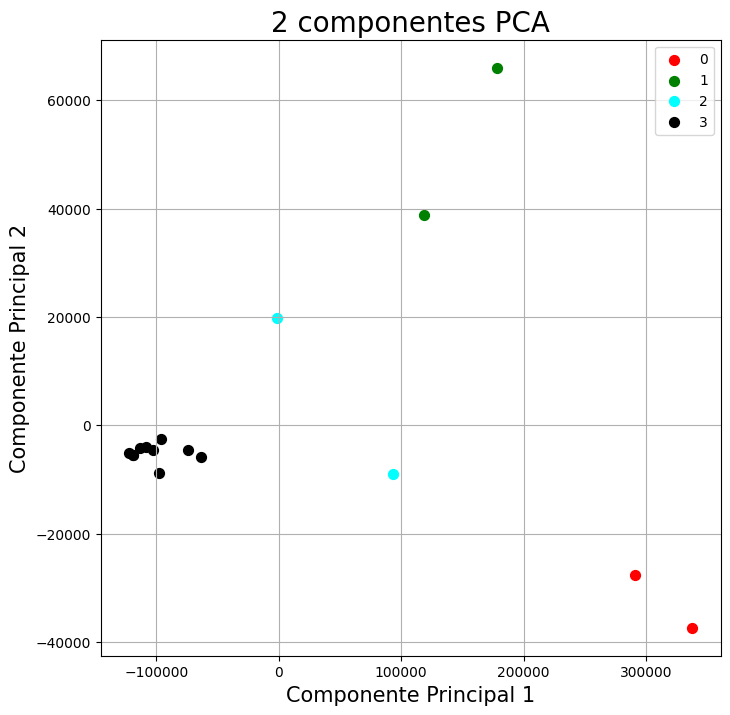

In [ ]:
# Agrupamiento por KMEANS
mbti_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
mbti = mbti_orig.drop(columns=['personality', 'count'])

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components = 2)

X_train = pca.fit_transform(mbti)

print("Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):")
print(pca.feature_names_in_)
print()

print("Coeficientes de las dos componentes")
print("Componente 1:")
print(pca.components_[0])
print("Componente 2:")
print(pca.components_[1])
print()

print("Varianza explicada de cada componente:")
print(pca.explained_variance_ratio_)
print()

pca1 = np.abs(pca.components_[0])
pca1sum = np.sum(pca1)
pca1p = pca1/pca1sum

pca1p_inds = pca1p.argsort()
sorted_pca1p = pca1p[pca1p_inds[::-1]]
sorted_pca1p_label = pca.feature_names_in_[pca1p_inds[::-1]]
comb_pca1p = np.dstack((sorted_pca1p_label, sorted_pca1p))

print("Porcentaje de la influencia de cada variable en la componente 1:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca1p[0]]))
print()

pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)
pca2p = pca2/pca2sum

pca2p_inds = pca2p.argsort()
sorted_pca2p = pca2p[pca2p_inds[::-1]]
sorted_pca2p_label = pca.feature_names_in_[pca2p_inds[::-1]]
comb_pca2p = np.dstack((sorted_pca2p_label, sorted_pca2p))

print("Porcentaje de la influencia de cada variable en la componente 2:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca2p[0]]))
print()


pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)

km = KMeans(
    n_clusters=4, init='random',
    n_init=12, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(mbti)

principalDf = pd.DataFrame(data = X_train
             , columns = ['Componente Principal 1', 'Componente Principal 2'])
principalDf.insert(loc=0, column='Personalidad', value=mbti_orig['personality'])

print(principalDf)
print()

print("Agrupamiento en 4 clases usando KMeans")
comb_km = np.dstack((mbti_orig['personality'], y_km))
print(comb_km)
print()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'cyan', 'black']

mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
for target, color in zip(targets,colors):
    indicesToKeep = y_km == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Componente Principal 1']
               , principalDf.loc[indicesToKeep, 'Componente Principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


for i in range(4):
  print('Grupo ' + str(i))
  for j in range(16):
    if (i == y_km[j]):
      print(mbti['personality'][j])
  print()


### Comentarios: 4. Agrupamiento por KMeans y PCA para visualizar las personalidades en 2 dimensiones
* Realizamos un agrupamiento de las 16 personalidades en 4 grupos por cercanía en el espacio multidimensional de las frecuencias de las palabras normalizadas.
* Para visualizar los puntos realizamos un análisis en componentes principales de dos dimensiones.
* Se muestra la varianza explicada de cada componente en donde vemos que ya con
una primer componente se puede explicar casi toda la varibilidad.
* Después vemos el porcentaje de influencia de cada palabra en cada componente ordenadas de mayor a menor.
* Vemos que se genera un grupo grande con 10 tipos de personalidad, y 3 grupos pequeños de dos tipos de personalidad.
* Se grafican los grupos usando las dos componentes principales.


### Conclusión
---

> Luego de este análisis, podemos concluir que las siguientes palabras influyen en mayor medida en el test de personalidades:
* like 5.43%
* think 4.75%
* people 4.47%
* get 4.21%
* thing 3.30%

> Vemos en la nube de palabras como las mismas palabras se corresponden.

> Vemos en el gráfico final que está la mayor cantidad de tipos de personalidades según las similitudes de las frecuencias de palabras en el grupo 4 del agrupamiento.
